# Import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
path ='../data/car_price.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# Describe data


In [3]:
def describle_data():
    print('Shape of data:\n', df.shape)
    print('--'*20)
    print('Columns of data: \n', df.columns)
    print('--'*20)
    print('Data types of data: \n', df.dtypes)
    print('--'*20)
    print('Missing values of data: \n', df.isnull().sum())
    print('--'*20)
    print('Describe data: \n', df.describe())
    print('--'*20)
    print('Info data: \n', df.info())
describle_data()

Shape of data:
 (5512, 10)
----------------------------------------
Columns of data: 
 Index(['Unnamed: 0', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats'],
      dtype='object')
----------------------------------------
Data types of data: 
 Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object
----------------------------------------
Missing values of data: 
 Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64
-----------------------

# Preprocessing data

Calculating prices in rupee and change it to VND
First move Lakh from price to new column and then change it to VND
Lakh is 100000 rupee
Crore is 10000000 rupee
1 rupee = 284.35 VND (6/5/2023)

 The import tax for cars from non-ASEAN regions to Vietnam is 70%, and the special consumption tax ranges from 40-150%. India has an import tax of 60% and a special consumption tax ranging from 12.5-30%.
 So we will calculate tax for car price in VND is about 47.222% larger than price car in India

In [4]:
# drop unwanted column
df = df.drop(columns=["Unnamed: 0"], axis=1)


In [5]:
def convert_price(price):
    value, unit = price.split(' ')
    value = value.replace(',', '.')
    if unit == 'Lakh':
        return float(value) * 100000
    elif unit == 'Crore':
        return float(value) * 10000000
    else:
        return float(value)

def change_price_to_vnd(price):
    return price * 284.35
def calculate_tax(price):
    return price*1.4722

df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_price)
df.rename(columns={'car_prices_in_rupee': 'car_prices_in_vnd'}, inplace=True)
df['car_prices_in_vnd'] = df['car_prices_in_vnd'].apply(change_price_to_vnd).apply(calculate_tax)

In [6]:
df.head()


,car_name,car_prices_in_vnd,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,4.198759e+08,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,5.370895e+08,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,6.865369e+08,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,3.252678e+08,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,2.155893e+08,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


Convert driven km to float

In [7]:
def convert_driven_km(driven_km):
    value= driven_km.split(' ')[0]
    #only get number in value
    for char in value:
        if char.isalpha() or char == ',':
            value = value.replace(char, '')
    return float(value)
df['kms_driven'] = df['kms_driven'].apply(convert_driven_km)

In [8]:
df['kms_driven'].head()

0    86226.0
1    13248.0
2    60343.0
3    26696.0
4    69414.0
Name: kms_driven, dtype: float64

Ownership column


In [9]:
df['ownership']=df['ownership'].astype(str)
df['ownership']=df['ownership'].str[0]
df['ownership'].head()
df['ownership']=df['ownership'].astype(int)

In [10]:
df['ownership'].head()

0    1
1    1
2    1
3    1
4    1
Name: ownership, dtype: int32

Engine Column


In [11]:
def convertEngine(engine):
    value= engine.split(' ')[0]
    value = value.replace(',', '.')
    return float(value)
df['engine']=df['engine'].astype(str)
df['engine']=df['engine'].apply(convertEngine)
df['engine'].head()

0    1956.0
1    1330.0
2    2494.0
3    1199.0
4    1199.0
Name: engine, dtype: float64

Seats column

In [12]:
df['Seats']=df['Seats'].astype(str)
df['Seats']=df['Seats'].str[0]
df['Seats']=df['Seats'].astype(int)
df['Seats'].head()

0    5
1    5
2    5
3    5
4    5
Name: Seats, dtype: int32

In [13]:
describle_data()

Shape of data:
 (5512, 9)
----------------------------------------
Columns of data: 
 Index(['car_name', 'car_prices_in_vnd', 'kms_driven', 'fuel_type',
       'transmission', 'ownership', 'manufacture', 'engine', 'Seats'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name              object
car_prices_in_vnd    float64
kms_driven           float64
fuel_type             object
transmission          object
ownership              int32
manufacture            int64
engine               float64
Seats                  int32
dtype: object
----------------------------------------
Missing values of data: 
 car_name             0
car_prices_in_vnd    0
kms_driven           0
fuel_type            0
transmission         0
ownership            0
manufacture          0
engine               0
Seats                0
dtype: int64
----------------------------------------
Describe data: 
        car_prices_in_vnd     kms_driven    ownership  manufacture  \
co

# Category column
Fuel type have 5 different values, we use one hot encoding for this column

Text(0.5, 0, 'Transmission')

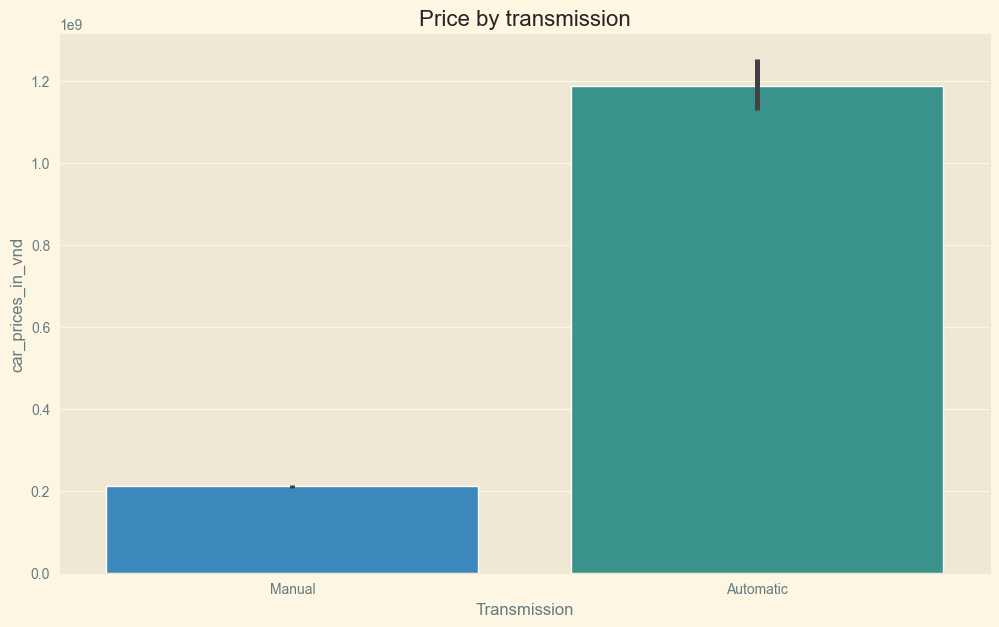

In [14]:
# plot for transmission manual and automatic
plt.style.use('Solarize_Light2')
# plot price by transmission manual and automatic
plt.figure(figsize=(12,7))
sns.barplot(x='transmission',y='car_prices_in_vnd',data=df)
plt.title('Price by transmission')
plt.xlabel('Transmission')

In [15]:
df['fuel_type'].value_counts()
oec=OneHotEncoder()
oec.fit(df[['fuel_type']])
fuel_type=oec.transform(df[['fuel_type']]).toarray()
encoded_df=pd.DataFrame(fuel_type,columns=oec.get_feature_names_out(['fuel_type']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['fuel_type'], axis=1, inplace=True)
df.head()


,car_name,car_prices_in_vnd,kms_driven,transmission,ownership,manufacture,engine,Seats,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol
0,Jeep Compass 2.0 Longitude Option BSIV,4.198759e+08,86226.0,Manual,1,2017,1956.0,5,0.0,1.0,0.0,0.0,0.0
1,Renault Duster RXZ Turbo CVT,5.370895e+08,13248.0,Automatic,1,2021,1330.0,5,0.0,0.0,0.0,0.0,1.0
2,Toyota Camry 2.5 G,6.865369e+08,60343.0,Automatic,1,2016,2494.0,5,0.0,0.0,0.0,0.0,1.0
3,Honda Jazz VX CVT,3.252678e+08,26696.0,Automatic,1,2018,1199.0,5,0.0,0.0,0.0,0.0,1.0
4,Volkswagen Polo 1.2 MPI Highline,2.155893e+08,69414.0,Manual,1,2016,1199.0,5,0.0,0.0,0.0,0.0,1.0


Transmission column
Transmission column have 2 different values, we use one hot encoding for this column

In [16]:
df['transmission'].value_counts()
oec=OneHotEncoder()
oec.fit(df[['transmission']])
transmission=oec.transform(df[['transmission']]).toarray()
encoded_df=pd.DataFrame(transmission,columns=oec.get_feature_names_out(['transmission']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['transmission'], axis=1, inplace=True)
df.head()


,car_name,car_prices_in_vnd,kms_driven,ownership,manufacture,engine,Seats,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol,transmission_Automatic,transmission_Manual
0,Jeep Compass 2.0 Longitude Option BSIV,4.198759e+08,86226.0,1,2017,1956.0,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Renault Duster RXZ Turbo CVT,5.370895e+08,13248.0,1,2021,1330.0,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Toyota Camry 2.5 G,6.865369e+08,60343.0,1,2016,2494.0,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Honda Jazz VX CVT,3.252678e+08,26696.0,1,2018,1199.0,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Volkswagen Polo 1.2 MPI Highline,2.155893e+08,69414.0,1,2016,1199.0,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [17]:
describle_data()

Shape of data:
 (5512, 14)
----------------------------------------
Columns of data: 
 Index(['car_name', 'car_prices_in_vnd', 'kms_driven', 'ownership',
       'manufacture', 'engine', 'Seats', 'fuel_type_Cng', 'fuel_type_Diesel',
       'fuel_type_Electric', 'fuel_type_Lpg', 'fuel_type_Petrol',
       'transmission_Automatic', 'transmission_Manual'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name                   object
car_prices_in_vnd         float64
kms_driven                float64
ownership                   int32
manufacture                 int64
engine                    float64
Seats                       int32
fuel_type_Cng             float64
fuel_type_Diesel          float64
fuel_type_Electric        float64
fuel_type_Lpg             float64
fuel_type_Petrol          float64
transmission_Automatic    float64
transmission_Manual       float64
dtype: object
----------------------------------------
Missing values of data: 
 car

# Plot data

Plot car count by manufacturer

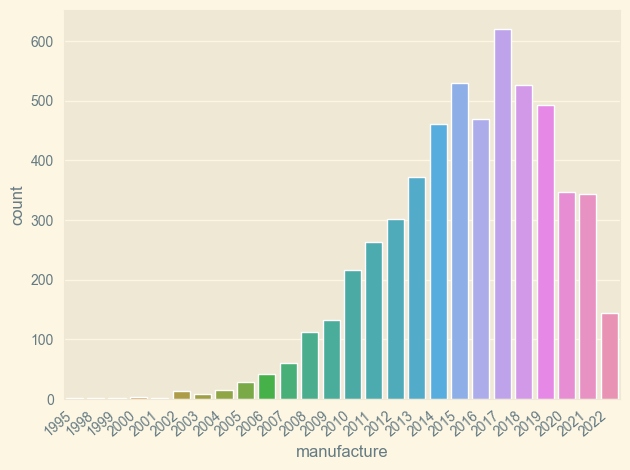

In [18]:
ax=sns.countplot(x='manufacture',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

Car price by manufacturer

<Axes: title={'center': 'Average car price by Year'}, xlabel='manufacture'>

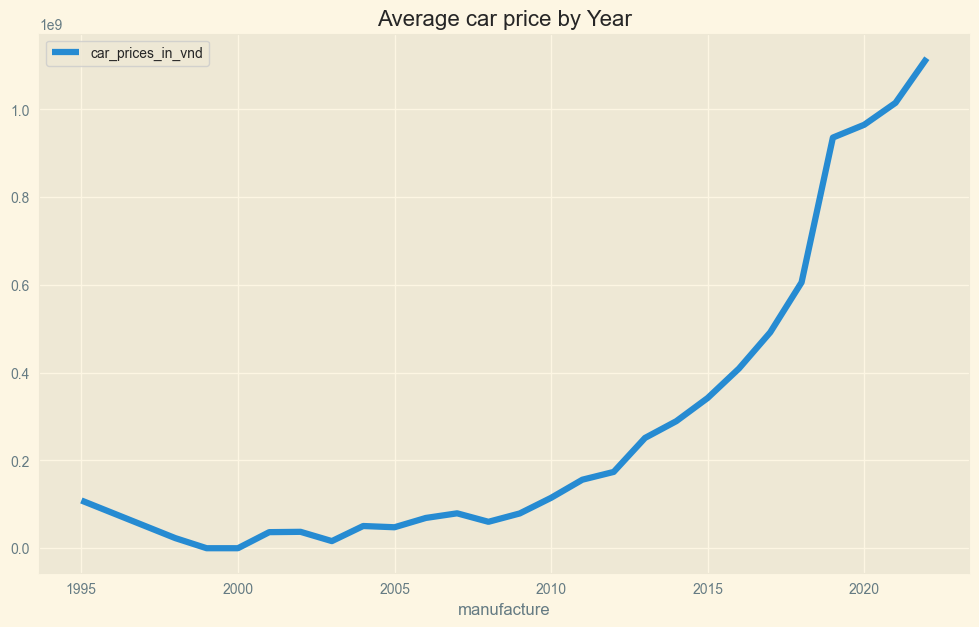

In [19]:
plt.style.use('Solarize_Light2')
pv1=pd.pivot_table(df, index=['manufacture'],values = ['car_prices_in_vnd'],aggfunc = 'mean')
pv1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

Car price by driven km

<Axes: title={'center': 'Average car price by Km driven'}, xlabel='kms_driven'>

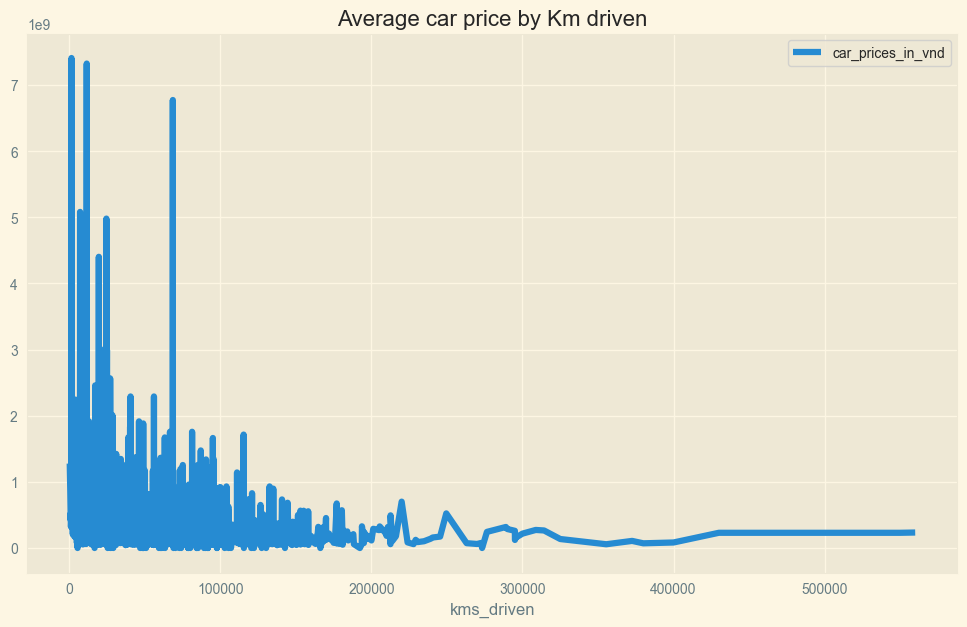

In [20]:
plt.style.use('Solarize_Light2')
pv1=pd.pivot_table(df, index=['kms_driven'],values = ['car_prices_in_vnd'],aggfunc = 'mean')
pv1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Km driven')

Seats
5    4673
7     631
4      88
6      61
8      54
2       5
Name: count, dtype: int64

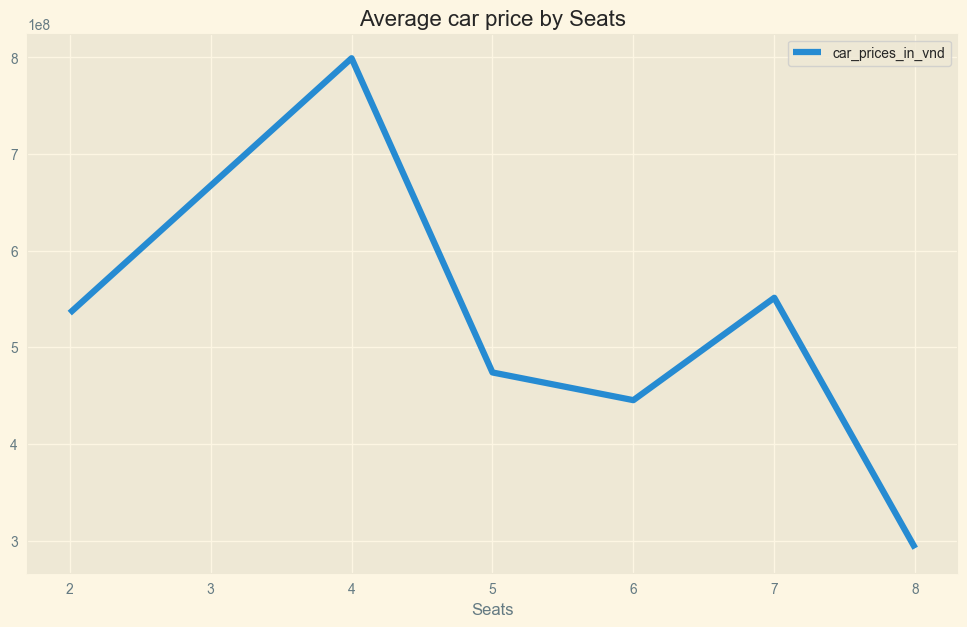

In [21]:
plt.style.use('Solarize_Light2')
pv1=pd.pivot_table(df, index=['Seats'],values = ['car_prices_in_vnd'],aggfunc = 'mean')
pv1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Seats')
df['Seats'].value_counts()

In [22]:
# plot for transmission manual and automatic
plt.style.use('Solarize_Light2')
# plot price by transmission manual and automatic
plt.figure(figsize=(12,7))
sns.barplot(x='transmission',y='car_prices_in_vnd',data=df)
plt.title('Price by transmission')
plt.xlabel('Transmission')

ValueError: Could not interpret input 'transmission'

<Figure size 1200x700 with 0 Axes>